# Proyek Analisis Data: BIKE SHARING BERDASARAKAN DATASET HARIAN
- **Nama:** ARIS SINOPA
- **Email:** sinopaaris@gmail.com
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Bagaimana perubahan jumlah pengguna bike sharing (kasual dan terdaftar) dari tahun ke tahun?
- Bagaimana pengaruh musim terhadap penggunaan bike sharing?
- Seberapa besar pengaruh kondisi cuaca  terhadap jumlah pengguna sepeda?


## Import Semua Packages/Library yang Digunakan

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [21]:
# data frame perhari
day_data_frame = pd.read_csv("dataset/day.csv")
day_data_frame

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**Insight:**
1. Ukuran dataset memiliki 731 entri dan 10 kolom dalam daset, yang mencakup berbagai informasi tentang penggunaan bike-sharing

2. Kolom yang Tersedia:
- instant: Indeks entri.
- dteday: Tanggal.
- season: Musim 
- yr: Tahun (0: 2011, 1: 2012).
- mnth: Bulan (0-11).
- holiday: Apakah hari itu hari libur (1) atau bukan (0).
- weekday: Hari dalam minggu 
- workingday: Apakah hari kerja (1) atau bukan (0).
- weathersit: Kondisi cuaca
- temp: Suhu aktual.
- atemp: Suhu yang dirasakan.
- hum: Kelembapan.
- windspeed: Kecepatan angin.
- casual: Jumlah pengguna casual.
- registered: Jumlah pengguna terdaftar.
- cnt: Total jumlah pengguna.

### Reshaping

In [22]:
# mengubah nama kolom variabel kedalam bahasa indonesia
day_data_frame = day_data_frame.rename(columns={'instant': 'rekor_indeks',
             'dteday': 'tanggal',
             'season': 'musim',
             'yr': 'tahun',
             'mnth': 'bulan',                                  
             'holiday': 'hari_libur',                                
             'weekday': 'hari_dlm_seminggu',
             'workingday': 'hari_kerja',
             'weathersit': 'kondisi_cuaca',
             'temp': 'suhu',
             'atemp': 'suhu_terasa',
             'hum': 'kelembapan',
             'windspeed': 'kecepatan_angin',
             'casual': 'pengguna_kasual',
             'registered': 'pengguna_terdaftar',
             'cnt': 'total_pengguna'})


day_data_frame

,rekor_indeks,tanggal,musim,tahun,bulan,hari_libur,hari_dlm_seminggu,hari_kerja,kondisi_cuaca,suhu,suhu_terasa,kelembapan,kecepatan_angin,pengguna_kasual,pengguna_terdaftar,total_pengguna
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [23]:
# Mengganti nilai yang ada pada variabel musim, tahun, bulan, hari_libur,hari_kerja, dan kondisi cuaca 
# bertujuan untuk mempermudah data di fahami.
musim_mapping = {
    1: 'musim semi',
    2: 'musim panas',
    3: 'musim gugur',
    4: 'musim dingin'
}

tahun_mapping = {
    0: '2011',
    1: '2012'
}

bulan_mapping =  {
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
    
}

hari_libur_mapping = {
    0: 'Tidak',
    1: 'Libur'
}

hari_dlm_seminggu_mapping = {
    0: 'Senin',
    1: 'Selasa',
    2: 'Rabu',
    3: 'Kamis',
    4: 'Jumat',
    5: 'Sabtu',
    6: 'Minggu'
}

hari_kerja_mapping = {
    0: 'Tidak',
    1: 'Ya'
}

# mengganti kondisi cuaca dengan memilih 1 sebagai perwakilan dari lainnya
kondisi_cuaca_mapping = {
    1: 'Clear',
    2: 'Mist + Cloudy',
    3: 'Light Snow',
    4: 'Heavy Rain'
}

# Mengganti nilai musim tahun, dan bulan dengan menggunakan map
day_data_frame['musim'] = day_data_frame['musim'].map(musim_mapping)
day_data_frame['tahun'] = day_data_frame['tahun'].map(tahun_mapping)
day_data_frame['bulan'] = day_data_frame['bulan'].map(bulan_mapping)
day_data_frame['hari_libur'] = day_data_frame['hari_libur'].map(hari_libur_mapping)
day_data_frame['hari_dlm_seminggu'] = day_data_frame['hari_dlm_seminggu'].map(hari_dlm_seminggu_mapping)
day_data_frame['hari_kerja'] = day_data_frame['hari_kerja'].map(hari_kerja_mapping)
day_data_frame['kondisi_cuaca'] = day_data_frame['kondisi_cuaca'].map(kondisi_cuaca_mapping)
day_data_frame

,rekor_indeks,tanggal,musim,tahun,bulan,hari_libur,hari_dlm_seminggu,hari_kerja,kondisi_cuaca,suhu,suhu_terasa,kelembapan,kecepatan_angin,pengguna_kasual,pengguna_terdaftar,total_pengguna
0,1,2011-01-01,musim semi,2011,Januari,Tidak,Minggu,Tidak,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,musim semi,2011,Januari,Tidak,Senin,Tidak,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,musim semi,2011,Januari,Tidak,Selasa,Ya,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,musim semi,2011,Januari,Tidak,Rabu,Ya,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,musim semi,2011,Januari,Tidak,Kamis,Ya,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,musim semi,2012,Desember,Tidak,Jumat,Ya,Mist + Cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,musim semi,2012,Desember,Tidak,Sabtu,Ya,Mist + Cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,musim semi,2012,Desember,Tidak,Minggu,Tidak,Mist + Cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,musim semi,2012,Desember,Tidak,Senin,Tidak,Clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [24]:
df_reshaping = day_data_frame
df_reshaping.to_csv('days_reshaped.csv', index=False)

**Insight:**
Melakukan Reshaping data
- nama pada tiap kolom variabel dirubah ke kedalam bahasa indonesia bertujuan untuk memudahkan memahami fitur variabel kolom
- begitupun dengan nilai yang ada pada variabel musim, tahun, bulan, hari_libur,hari_kerja, dan kondisi cuaca tujuannya sama untuk memudahkan
- kemudian kita menyimpan datasetnya untuk digunakan dalam analisis selanjutnya

### Assessing Data

In [25]:
df_reshaping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rekor_indeks        731 non-null    int64  
 1   tanggal             731 non-null    object 
 2   musim               731 non-null    object 
 3   tahun               731 non-null    object 
 4   bulan               731 non-null    object 
 5   hari_libur          731 non-null    object 
 6   hari_dlm_seminggu   731 non-null    object 
 7   hari_kerja          731 non-null    object 
 8   kondisi_cuaca       731 non-null    object 
 9   suhu                731 non-null    float64
 10  suhu_terasa         731 non-null    float64
 11  kelembapan          731 non-null    float64
 12  kecepatan_angin     731 non-null    float64
 13  pengguna_kasual     731 non-null    int64  
 14  pengguna_terdaftar  731 non-null    int64  
 15  total_pengguna      731 non-null    int64  
dtypes: float

In [26]:
df_reshaping.describe()

,rekor_indeks,suhu,suhu_terasa,kelembapan,kecepatan_angin,pengguna_kasual,pengguna_terdaftar,total_pengguna
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [27]:
df_reshaping.isna().sum()

rekor_indeks          0
tanggal               0
musim                 0
tahun                 0
bulan                 0
hari_libur            0
hari_dlm_seminggu     0
hari_kerja            0
kondisi_cuaca         0
suhu                  0
suhu_terasa           0
kelembapan            0
kecepatan_angin       0
pengguna_kasual       0
pengguna_terdaftar    0
total_pengguna        0
dtype: int64

In [28]:
print("Jumlah duplikasi: ", df_reshaping.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
1. Total Pengguna
****Total Pengguna Rata-rata: Rata-rata total pengguna per hari adalah 4504, dengan fluktuasi yang cukup besar (1937). Ini menunjukkan bahwa meskipun ada basis pengguna terdaftar yang kuat, ada ketidakpastian dalam jumlah pengguna kasual.**** 
****Minimum dan Maksimum Pengguna: Penggunaan bervariasi dari 22 hingga 8714 pengguna. Hal ini menunjukkan bahwa ada hari-hari tertentu yang sangat populer dan ada hari-hari dengan penggunaan yang sangat rendah.**** 
- tidak terdapat duplikasi data
- tidak terdapat data yang hilang
ini sangat baik untuk analisis selanjutnya

### Cleaning Data

In [29]:
# Ubah kolom tanggal menjadi datetime
df_reshaping['tanggal'] = pd.to_datetime(df_reshaping['tanggal'])


**Insight:**
- mengubah data type tanggal ke datatime64 untuk pemrosesan lebih lanjut
- xxx

In [30]:
df_reshaping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   rekor_indeks        731 non-null    int64         
 1   tanggal             731 non-null    datetime64[ns]
 2   musim               731 non-null    object        
 3   tahun               731 non-null    object        
 4   bulan               731 non-null    object        
 5   hari_libur          731 non-null    object        
 6   hari_dlm_seminggu   731 non-null    object        
 7   hari_kerja          731 non-null    object        
 8   kondisi_cuaca       731 non-null    object        
 9   suhu                731 non-null    float64       
 10  suhu_terasa         731 non-null    float64       
 11  kelembapan          731 non-null    float64       
 12  kecepatan_angin     731 non-null    float64       
 13  pengguna_kasual     731 non-null    int64         

## Exploratory Data Analysis (EDA)

### Explore ...

In [31]:
df_grouped = df_reshaping.groupby('tahun').agg({
    'total_pengguna': 'sum',
    'pengguna_kasual': 'sum',
    'pengguna_terdaftar': 'sum',
    'suhu': 'mean',
    'suhu_terasa': 'mean',
    'kelembapan': 'mean',
    'kecepatan_angin': 'mean'
}).reset_index()

df_grouped

,tahun,total_pengguna,pengguna_kasual,pengguna_terdaftar,suhu,suhu_terasa,kelembapan,kecepatan_angin
0,2011,1243103,247252,995851,0.486665,0.466835,0.643665,0.191403
1,2012,2049576,372765,1676811,0.504081,0.481852,0.612166,0.189572


In [32]:

# penggunaan berdasarkan musim selama 2011 dan 2012
df_grouped_musim = df_reshaping.groupby('musim').agg({
    'total_pengguna': 'sum'
}).reset_index()
df_grouped_musim 




,musim,total_pengguna
0,musim dingin,841613
1,musim gugur,1061129
2,musim panas,918589
3,musim semi,471348


In [33]:
# Pengaruh kondisi cuaca  Terhadap Pengguna selama 2011 dan 2012
df_grouped_cuaca = df_reshaping.groupby('kondisi_cuaca').agg({
    'total_pengguna': 'sum'
}).reset_index()
df_grouped_cuaca



,kondisi_cuaca,total_pengguna
0,Clear,2257952
1,Light Snow,37869
2,Mist + Cloudy,996858


In [34]:
# Membuat visualisasi perbandingan pengguna kasual dan pengguna terdaftar
df_grouped_total = df_grouped.agg({
    'pengguna_kasual': 'sum',
    'pengguna_terdaftar': 'sum'
}).reset_index()

df_grouped_total.columns = ['Tipe Pengguna', 'Total Pengguna']
df_grouped_total['Tipe Pengguna'] = ['Kasual', 'Terdaftar']
df_grouped_total


,Tipe Pengguna,Total Pengguna
0,Kasual,620017
1,Terdaftar,2672662


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

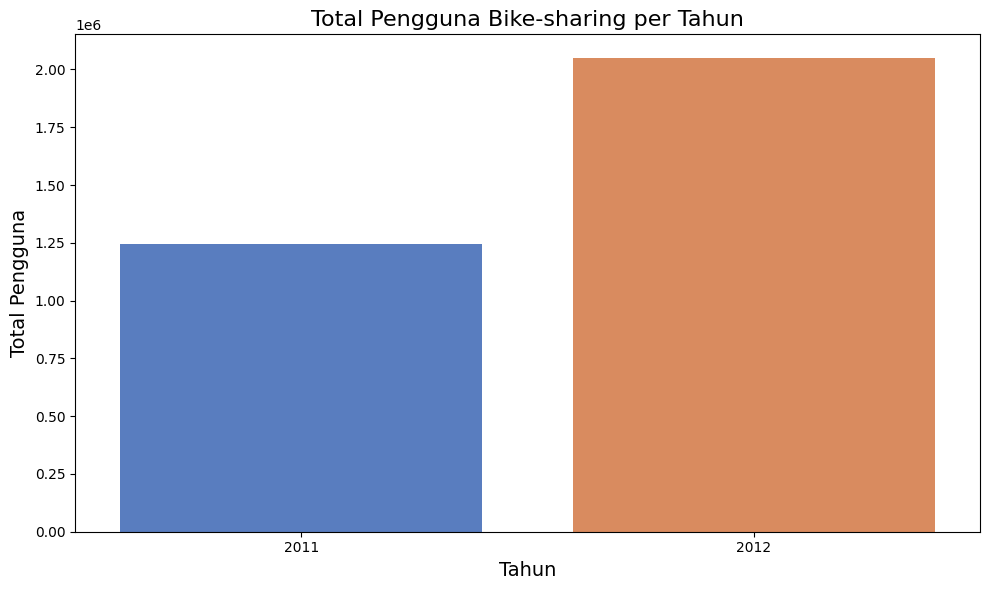

In [35]:
# Mengelompokkan data berdasarkan tahun dan menghitung total pengguna
df_grouped_tahun = df_reshaping.groupby('tahun').agg({
    'total_pengguna': 'sum'
}).reset_index()

# Visualisasi tren menggunakan bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped_tahun, x='tahun', y='total_pengguna', hue='tahun', palette='muted')
plt.title('Total Pengguna Bike-sharing per Tahun', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Total Pengguna', fontsize=14)
plt.xticks()
plt.tight_layout()
plt.show()

**terlihat ada peningkatan penggunaan di tahun 2012 dibandingkan 2011, ini bisa menjadi indikasi bahwa layanan bike-sharing semakin populer.**

### Pertanyaan 2:

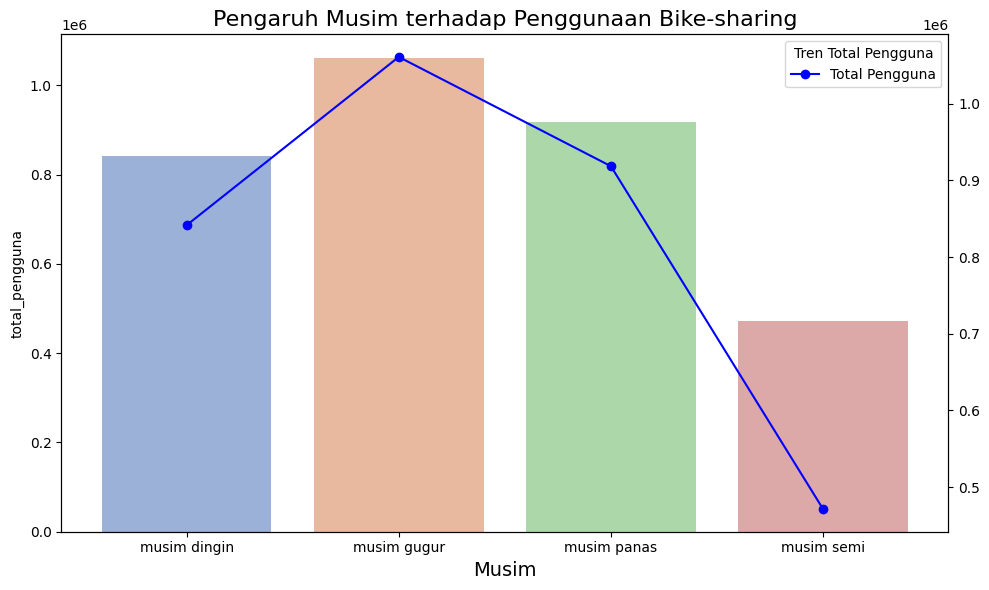

In [39]:

# penggunaan berdasarkan musim selama 2011 dan 2012
df_grouped_musim = df_reshaping.groupby('musim').agg({
    'total_pengguna': 'sum'
}).reset_index()
df_grouped_musim 
# Mengatur warna untuk setiap musim
palette = sns.color_palette("muted", len(df_grouped_musim))

# Membuat figure dan axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot
sns.barplot(x='musim', y='total_pengguna', hue='musim', data=df_grouped_musim, palette=palette, ax=ax1, alpha=0.6, legend=False)

# Line plot
ax2 = ax1.twinx()  # Membuat axis kedua
ax2.plot(df_grouped_musim['musim'], df_grouped_musim['total_pengguna'], marker='o', color='blue', label='Total Pengguna')

# Menambahkan label dan title
ax1.set_title('Pengaruh Musim terhadap Penggunaan Bike-sharing', fontsize=16)
ax1.set_xlabel('Musim', fontsize=14)

# Menambahkan legend
ax2.legend(title='Tren Total Pengguna')

# Menampilkan plot
plt.tight_layout()
plt.show()


**Pengguna Tertinggi:** 
- Musim gugur mencatat jumlah pengguna bike-sharing tertinggi. Ini menunjukkan bahwa banyak orang memilih bersepeda saat cuaca sejuk dan nyaman.

**Pengguna Terendah**
- Musim semi memiliki jumlah pengguna terendah dibandingkan musim lainnya. Cuaca yang tidak menentu, seperti hujan dan suhu dingin, mengurangi minat orang untuk bersepeda.

**Pengguna Stabil**
- Musim panas dan dingin menunjukkan angka penggunaan yang stabil, tidak terlalu tinggi atau rendah. Ini menunjukkan bahwa meskipun ada potensi, ada faktor yang membatasi minat untuk menggunakan bike-sharing.

### Pertanyaan 3:

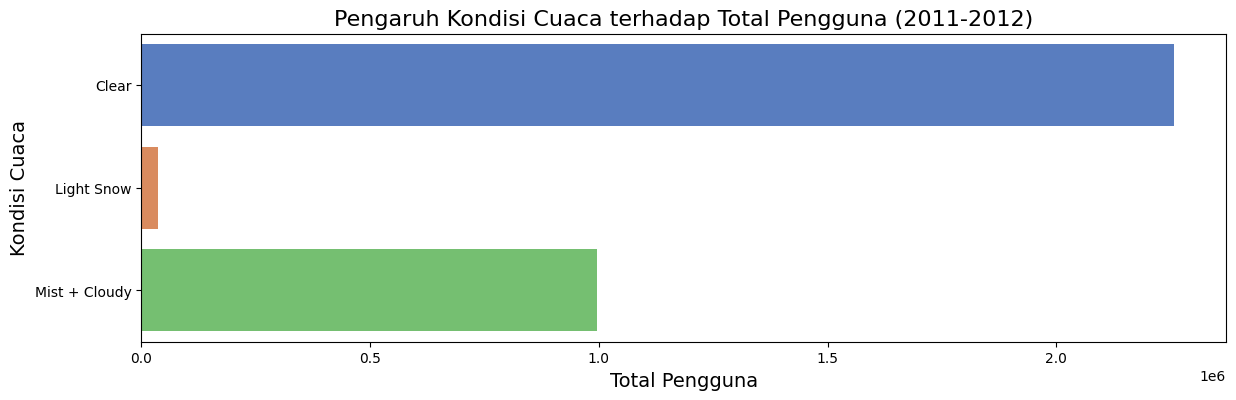

In [37]:
# Pengaruh kondisi cuaca  Terhadap Pengguna selama 2011 dan 2012
df_grouped_cuaca = df_reshaping.groupby('kondisi_cuaca').agg({
    'total_pengguna': 'sum'
}).reset_index()
df_grouped_cuaca

plt.figure(figsize=(14, 4))
sns.barplot(y='kondisi_cuaca', x='total_pengguna', data=df_grouped_cuaca,hue='kondisi_cuaca', palette='muted', legend=False)
plt.title('Pengaruh Kondisi Cuaca terhadap Total Pengguna (2011-2012)', fontsize=16)
plt.xlabel('Total Pengguna', fontsize=14)
plt.ylabel('Kondisi Cuaca', fontsize=14)
plt.show()


**"Analisis data menunjukkan bahwa kondisi cuaca memiliki pengaruh yang signifikan terhadap jumlah total pengguna. Cuaca cerah (Clear) secara konsisten menarik jumlah pengguna terbesar, yang mengindikasikan bahwa aktivitas luar ruangan dan suasana hati yang positif berkontribusi pada peningkatan penggunaan aplikasi. Sebaliknya, cuaca bersalju (Light Snow) memiliki jumlah pengguna paling sedikit, kemungkinan karena terbatasnya aktivitas luar ruangan dan potensi gangguan pada jaringan sementara untuk cuaca Misty + Cloudy berada pada angka normal terhadap pengaruh pengguna"**

## Analisis Lanjutan (Opsional)

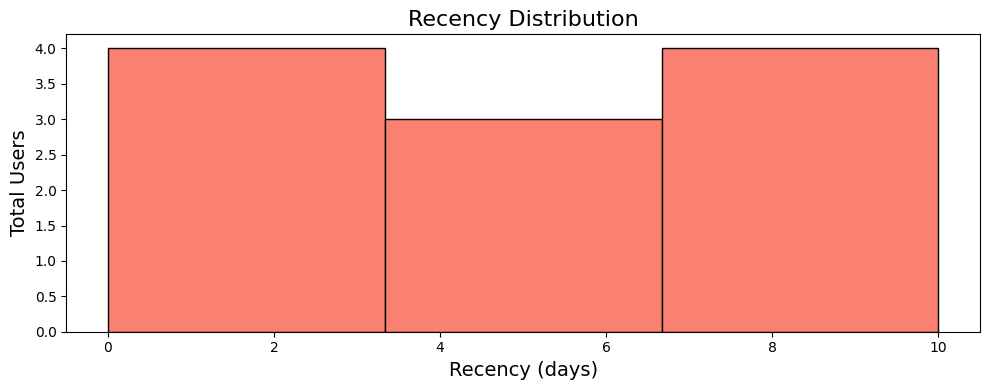

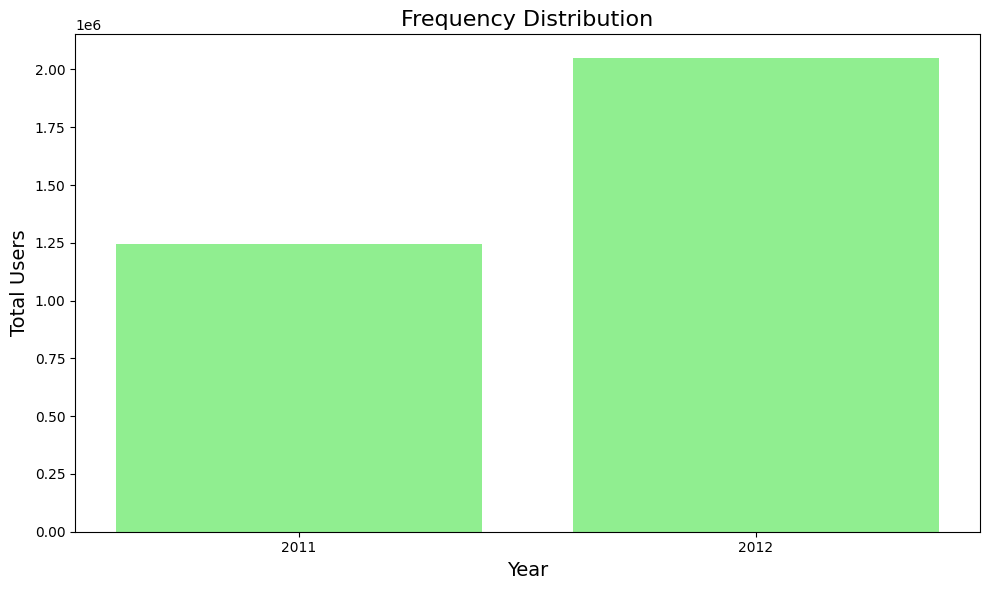

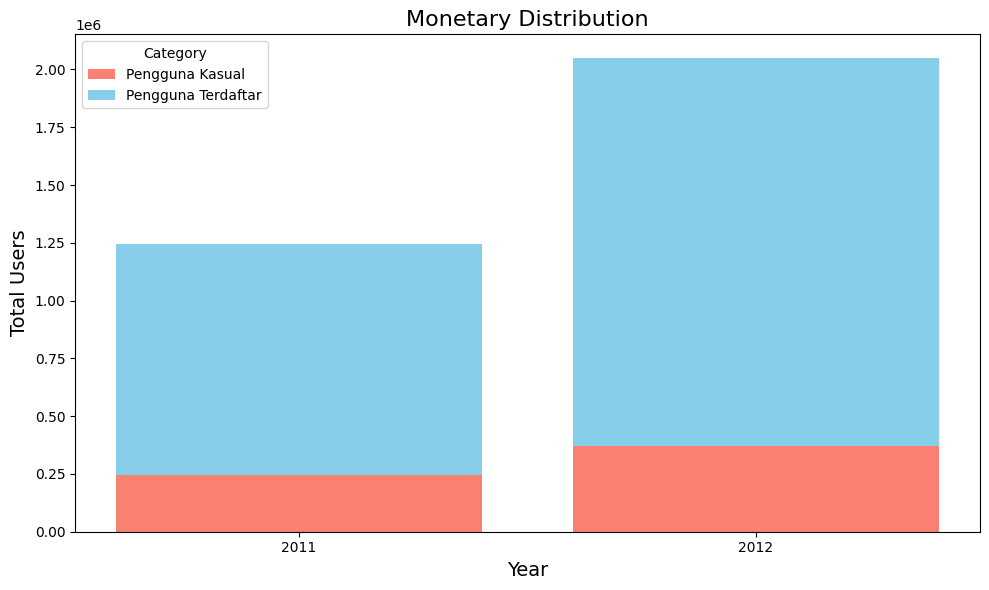

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Asumsi df sudah didefinisikan sebelumnya
# Menghitung Recency
df_reshaping['tanggal'] = pd.to_datetime(df_reshaping['tanggal'])
last_date = df_reshaping['tanggal'].max()
df_reshaping['recency'] = (last_date - df_reshaping['tanggal']).dt.days 
df_filtered = df_reshaping[df_reshaping['recency'] <= 10]
n = len(df_filtered)
bins = int(np.sqrt(n))

# Visualisasi Recency
# Histogram Recency
plt.figure(figsize=(10, 4))
plt.hist(df_filtered['recency'], bins=bins, color='salmon', edgecolor='black')
plt.title('Recency Distribution', fontsize=16)
plt.xlabel('Recency (days)', fontsize=14)
plt.ylabel('Total Users', fontsize=14)
plt.tight_layout()
plt.show()

# Menghitung Frequency
df_frequency = df_reshaping.groupby('tahun').agg({'total_pengguna': 'sum'}).reset_index()

# Visualisasi Frequency
# Bar chart Frequency
plt.figure(figsize=(10, 6))
plt.bar(df_frequency['tahun'], df_frequency['total_pengguna'], color='#90EE90')
plt.title('Frequency Distribution', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Users', fontsize=14)
plt.xticks()  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

# Menghitung Monetary
df_monetary = df_reshaping.groupby('tahun').agg({
    'pengguna_kasual': 'sum',
    'pengguna_terdaftar': 'sum'
}).reset_index()

# Visualisasi Monetary
# Stacked bar chart Monetary
plt.figure(figsize=(10, 6))
plt.bar(df_monetary['tahun'], df_monetary['pengguna_kasual'], label='Pengguna Kasual', color='salmon')
plt.bar(df_monetary['tahun'], df_monetary['pengguna_terdaftar'], bottom=df_monetary['pengguna_kasual'], label='Pengguna Terdaftar', color='skyblue')

plt.title('Monetary Distribution', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Users', fontsize=14)
plt.legend(title='Category')
plt.xticks()  # Rotate x labels for better readability
plt.tight_layout()
plt.show()


## Conclusion

**Conclution pertanyaan 1**
- Data menunjukkan bahwa layanan bike-sharing memiliki potensi yang sangat besar untuk berkembang di masa depan. Dengan strategi yang tepat, layanan ini dapat menjadi bagian integral dari sistem transportasi perkotaan yang lebih berkelanjutan dan ramah lingkungan.

**Conclution pertanyaan 2**
- Pola penggunaan bike-sharing sangat dipengaruhi oleh faktor musiman, terutama oleh kondisi cuaca. Data menunjukkan bahwa:
- Musim gugur adalah puncak penggunaan: Cuaca yang sejuk dan cerah mendorong minat bersepeda, sehingga jumlah pengguna mencapai titik tertinggi pada musim ini.
- Musim semi mengalami penurunan signifikan: Cuaca yang tidak menentu dengan hujan dan suhu yang masih dingin membuat minat masyarakat untuk bersepeda menurun drastis.
- Musim panas dan dingin cenderung stabil: Meskipun tidak setinggi musim gugur, penggunaan bike-sharing pada musim panas dan dingin cenderung stabil, menunjukkan adanya segmen pasar yang tetap menggunakan layanan ini.

**conclution pertanyaan 3**
- "Berdasarkan analisis data, dapat disimpulkan bahwa cuaca cerah merupakan faktor pendorong utama peningkatan jumlah pengguna. Perusahaan sebaiknya memanfaatkan momentum ini dengan meningkatkan promosi produk atau layanan yang berhubungan dengan aktivitas luar ruangan pada saat cuaca cerah. Selain itu, perusahaan juga perlu mempersiapkan diri menghadapi cuaca ekstrem dengan mengembangkan fitur-fitur yang dapat meningkatkan kenyamanan pengguna selama cuaca buruk dan memastikan bahwa layanan tetap dapat diakses secara optimal."